# 지도 학습
## 2.1 분류와 회귀
## 2.3 지도 학습 알고리즘
### 2.3.1 예제에 사용할 데이터셋

In [2]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


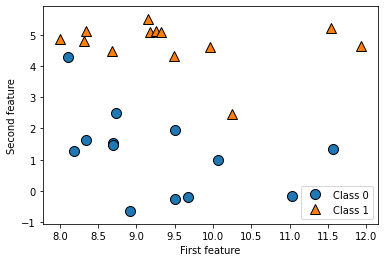

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

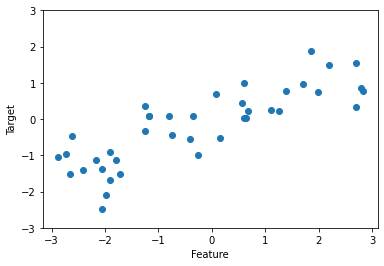

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
#보스턴 주택가격 데이터셋
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [9]:
#특성 공학, 13개의 원래 특성에 중복 포함 13개에서 2개씩 짝지어 곱한 91개의 특성을 더함
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


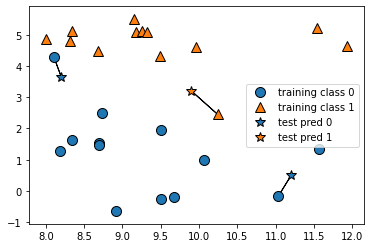

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


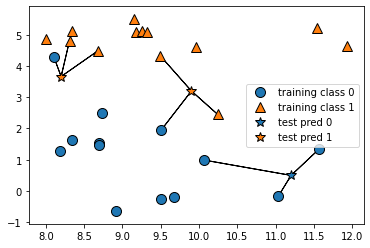

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
#데이터셋 나누기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
#이웃 3개로 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


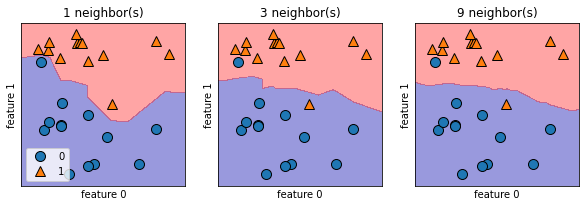

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

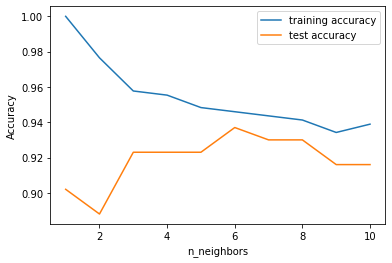

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

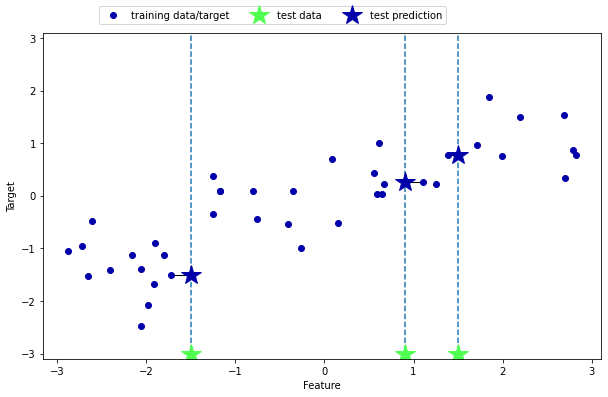

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

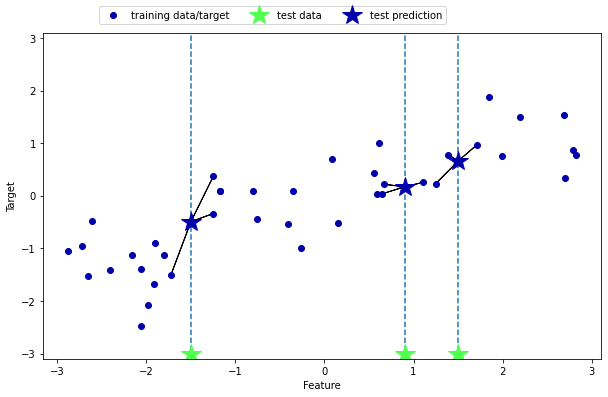

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
#최근접을 회귀 모델에 적용
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


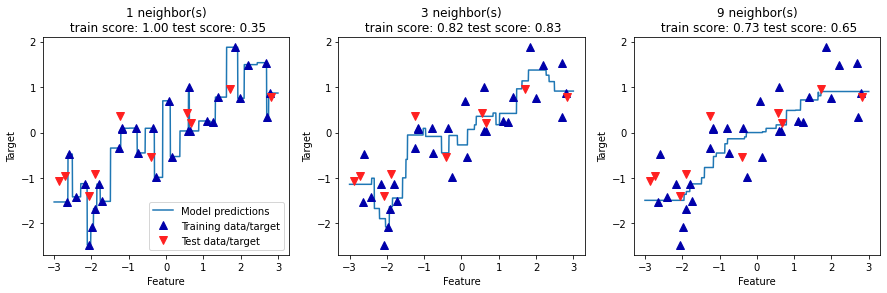

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

# 2.3.3 선형 모델
- **입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.**

### 회귀의 선형 모델
- **일반화 된 예측함수: y^ = w[0]x[0]+ w[1]x[1] + ... + w[p]*x[p] + b**

- **w(가중치)와 입력 특성([p])을 곱해서 더한 가중치의 합으로 볼 수 있다.**

w[0]: 0.393906  b: -0.031804


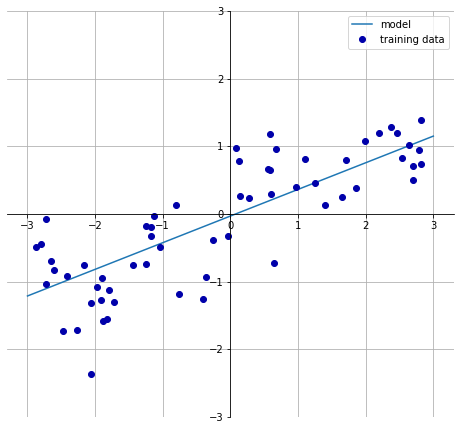

In [25]:
mglearn.plots.plot_linear_regression_wave()

- 최소 제곱법 회귀

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
#wave데이터셋에는 입력 특성이 하나라 밑의 원소들의 값도 하나만 나온다.
print("lr.coef_:", lr.coef_)  #가중치 
print("lr.intercept_:", lr.intercept_) #편향, 절편 파라미터(b)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [28]:
#정확도 낮고 둘의 정확도가 비슷한 것을 보아 과소적합이다
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [29]:
#보스턴 주택 가격 데이터를 가져와 복잡한 것을 해보자
#데이터셋을 불러온 후 데이터 세트 나누기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
#훈련 세트에 대한 일반화가 과도하기 때문에 과대적합이다
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## 내가 해본 Lasso 회귀(L1 규제)

**가중치를 줄이다 못해 0으로 만들어 버리기 때문에 정확도가 낮은가?**

**가중치에 크기에 따라 규제량이 변하지 않는다**

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.29
Test set score: 0.21


In [32]:
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso10.score(X_test, y_test)))

Training set score: 0.00
Test set score: -0.00


In [33]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

Training set score: 0.90
Test set score: 0.77


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  model = cd_fast.enet_coordinate_descent(


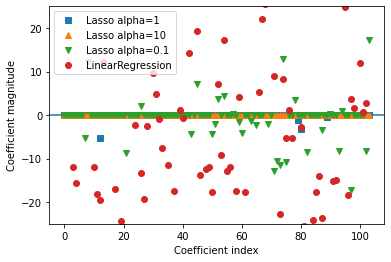

In [34]:
#alpha 값에 따른 coef 값들의 변화 그래프
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso10.coef_, '^', label="Lasso alpha=10")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

## Ridge 회귀(L2 규제)

**가중치의 절댓값을 작게 만든다.**

**그레이디언트 계산에 가중치의 값 자체가 포함되므로 모 아니면 도 느낌이 아니다**

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used:", np.sum(ridge.coef_ != 0))
#과대적합이 적어졌다

Training set score: 0.89
Test set score: 0.75
Number of features used: 104


In [36]:
#alpha 값을 높이면 0에 더 가깝게 만들기 때문에 과대적합을 더 피할 수 있다
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Number of features used:", np.sum(ridge10.coef_ != 0))

Training set score: 0.79
Test set score: 0.64
Number of features used: 104


In [37]:
#반대로 alpha 값을 줄이면 선형 회귀와 비슷해진다
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used:", np.sum(ridge01.coef_ != 0))

Training set score: 0.93
Test set score: 0.77
Number of features used: 104


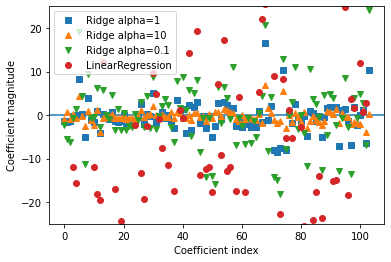

In [38]:
#alpha 값에 따라 모델의 coef_속성이 어떻게 달라지는지 조사하는 그래프
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

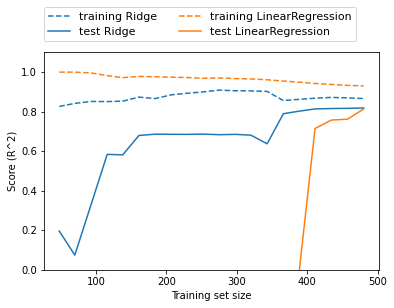

In [39]:
#크기에 따른 모델의 성능 변화를 나타낸 그래프(학습 곡선)
#앞에서 본 것과 같이 과대적합이 줄어드는 것을 볼 수 있지만
#데이터를 충분이 주면 규제의 영향은 줄어든다는 것을 알 수 있다
mglearn.plots.plot_ridge_n_samples()

## Lasso 회귀 (L1 규제)
- **Ridged와 다르게 L1 규제를 사용하기 때문에 계수가 0이 되기도 한다.(제외되는 특성 생김)**
- **다른 시각으로 보면 특성을 선택하게 되는 느낌**

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))
#104개중 4개만 사용되어서 점수가 낮다

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [41]:
#특성값이 줄었기에 과소 적합이며 해결하기 위해 alpha 값을 줄인다.(반복 실행하는 최대 횟수를 증가 시켜줘야 한다.)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
#하지만 사용된 특성은 33개로 여전히 적기에 모델을 분석하기 힘들다

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [42]:
#더 많은 특성을 사용하기 위해 alpha값을 낮췄지만 과대적합이 되므로 linearRegression과 
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

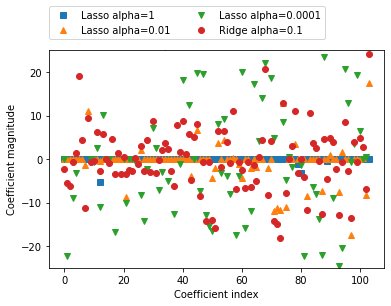

In [43]:
#Ridge01, Lasso001는 둘이 성능은 비슷하지만 Ridge는 어떤 계수도 0이 되지 않는다.따라서 Ridge 모델을 선호한다.
#두 모델의 규제를 결합한 ElasticNet은 최상의 성능을 내지만 매개변수 두개를 조정해야한다.
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## 분류용 선형 모델 - 이진 분류
- **'y^ = w[0]x[0]+ w[1]x[1] + ... + w[p]*x[p] + b > 0' 의 방정식을 갖는다**
- **계산한 값이 0보다 크면 클래스를 +1 작으면 -1 해주는 방식**
- **직선, 평면, 초평면을 사용해서 이진 분류를 진행하는 것이다**

### LogisticRegression and SupportVectorMachine
- **두 모델은 기본적으로 L2 규제를 사용한다**

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


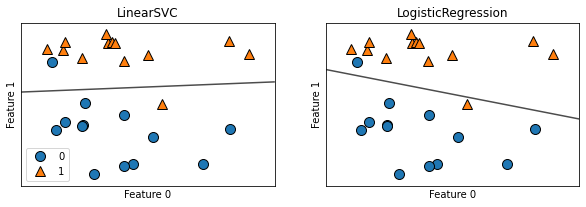

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
#둘이 비슷한 결정 경계를 만듦

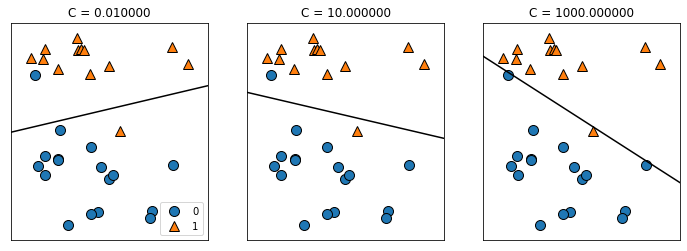

In [45]:
#두 분류 알고리즘의 규제의 강도를 결정하는 매개변수인 C를 달리 한 그래프들이다.
#C가 커지면 훈련 세트에 맞춰지고 작아지면 계수 벡터(w)가 0에 가까워진다.
#규제를 강하게 하면 할 수록 과대적합이 되는 것을 볼 수 있다.
mglearn.plots.plot_linear_svc_regularization()

### 유방암 데이터셋을 이용한 LogisticRegression

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

##성능이 매우 비슷하니 과소적합인듯 하다

Training set score: 0.946
Test set score: 0.958


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#제약을 풀어주기 위해 C를 증가
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

#C를 증가시키니 성능이 좋아짐

Training set score: 0.944
Test set score: 0.951


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
#규제를 강하게 하기 위해 C를 줄임
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

#제약이 강해짐->특성 적어짐->과소적합

Training set score: 0.934
Test set score: 0.930


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


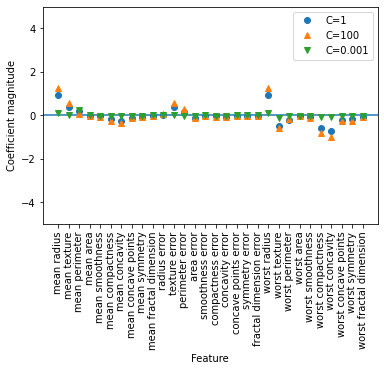

In [49]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

#texture error과 같은 경우에는 악성과 연관 깊다는 식으로 클래스와 특성간의 연관성을 유추 할 수 있다.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


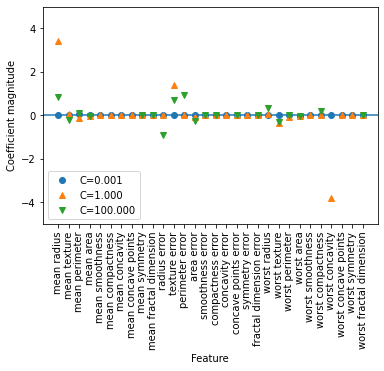

In [50]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

#L1 규제를 사용 시 특성은 적으나 명확한 이해가 가능하다.
#모델들의 주요 차이는 어떤 penalty를 주냐에 달려있다.

## 다중 클래스 분류용 선형 모델

- **로지스틱 회귀 제외 많은 선형 모델은 태생적으로 이진 분류만 지원함**
- **일대다 방식: 이진 분류->다중 분류로의 확장, 클래스 마다 이진 분류를 진행 후 모든 이진 분류를 실행하여 가장 높은 점수의 클래스를 예측 값으로 사용**

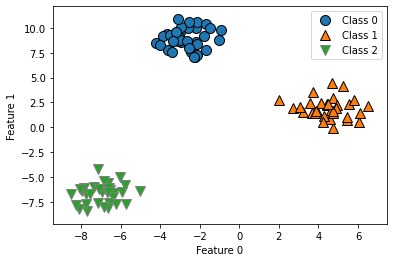

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [52]:
#위의 데이터셋으로 훈련하기
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


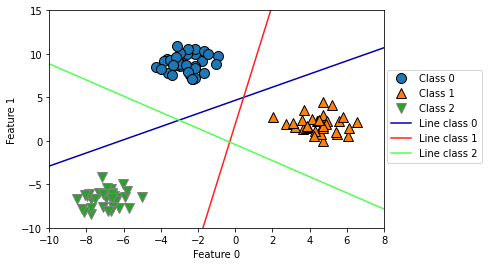

In [53]:
#세 개의 이진 분류기가 만드는 경계의 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

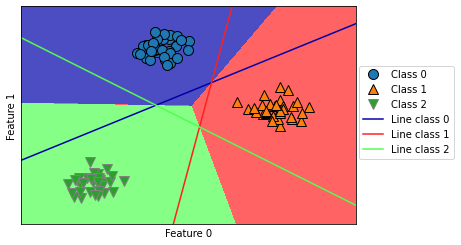

In [54]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 장단점과 매개변수

- 앞서 설명한 C와 alpha는 로그스케일로 최적값을 찾으며 중요한 특성이 많지 않은 경우는 L1 그 외에는 기본적으로 L2규제를 사용한다.

- 선형 모델은 학습 속도, 예측이 빠르다. 그래서 큰 데이터셋이나 희소한 데이터셋에서도 작동을 잘한다. 빠르게 처리하려면 선형회귀 또는 릿지에 solver='sag' 옵션을 준다

- 예측이 어떻게 만들어질지 이해하기 쉬우나, 데이터셋의 특성간의 연관성이 깊을 땐 힘들다.

- 샘플에 비해 특성이 많을 때 잘 작동하나, 저차원의 데이터셋에선 다른 모델이 낫다.

# 2.3.4 나이브 베이즈 분류기
- **선형 모델과 비슷하고 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문에 속도가 더 빠르지만 일반화 성능이 안좋다**

- **대부분 텍스트 데이터를 분류할 때 사용**

- **MultinomialNb,BernoulliNb의 예측 공식은 선형 모델과 형태가 같다. 하지만 coef_는 선형 모델의 기울기 w와는 다름**

> 1.GaussianNb: 연속적인 어떤 데이터든 적용(고차원의 데이터셋)

        클래스별로 각 특성의 표준편차와 평균을 저장

> 2.BernoulliNb: 이진 데이터에 적용

        각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈

> 3.MultinomialNb: 카운트 데이터에 적용

        클래스별로 특성의 평균을 계산

- ### 특징

**2,3번은 텍스트 같은 희소한 데이터를 카운트하는 데 사용되며 MultinomialNb는 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 Bernoulli보다 성능이 좋다.**

**MultinomialNb,BernoulliNb의 alpha 매개변수 하나를 가지고 있다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인터를 alpha의 개수만큼 추가한다. 또한 alpha에 따른 성능 변동은 비교적 크진 않다.**

- ### 장단점

**선형 모델의 장단점과 비슷한데 선형 모델로는 학습 시간이 너무 오래 걸릴 때 시도해볼만 하다는 장점을 가지고있다.**

In [55]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
#BernoulliNb
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# 2.3.5 결정 트리

- ### 분류와 회귀 문제에 널리 사용되며 결정에 다다르기 위해 예/아니오 질문을 이어나가는 구조이다. 스무고개 놀이의 질문과 비슷하다.

- root node: 맨 위 노드, pure node: 타깃 하나로만 이루어진 노드

In [57]:
sys.path

['/Users/eungibae/Machin Learning',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/extensions',
 '/Users/eungibae/.ipython']

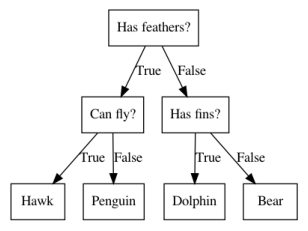

In [58]:
mglearn.plots.plot_animal_tree()

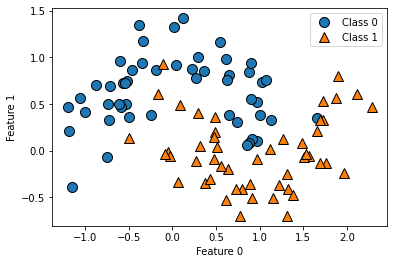

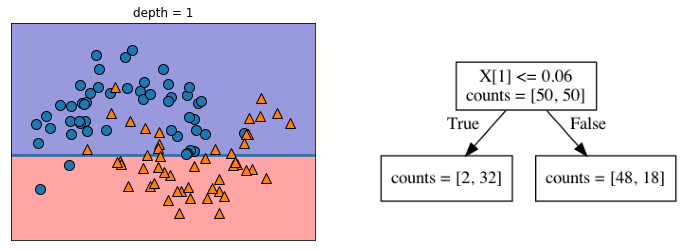

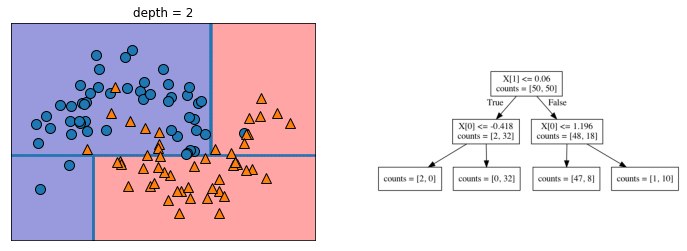

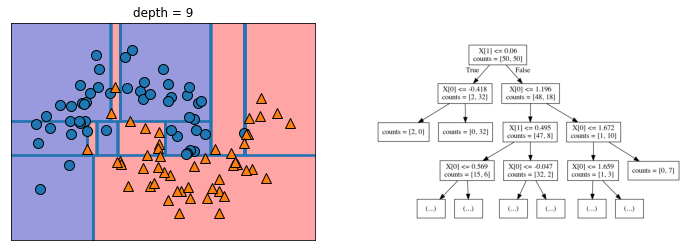

In [59]:
#결정 트리 만들기
mglearn.plots.plot_tree_progressive()

**순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하며 과대적합이다. 위의 그래프도 과대 적합이다.**

### 과대적합을 막는 전략 2가지

> **트리 생성을 일찍 중단하는 사전 가지치기**

트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의소 개수를 지정하는 것이다

> **트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하기**



In [60]:
#유방암 데이터셋을 이용한 트리
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#과대적합이 되었다.

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [61]:
#연속된 질문을 4개로 제한, 즉 깊이를 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#테스트 세트의 성능은 개선 됨

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### export_praphviz를 이용한 결정 트리 분석

- **알고리즘 예측이 어떻게 이루어지고 있는지 한 눈에 보기 쉽다**

**sample: 각 노드에 있는 샘플의 수**

**value: 클래스당 샘플의 수**

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

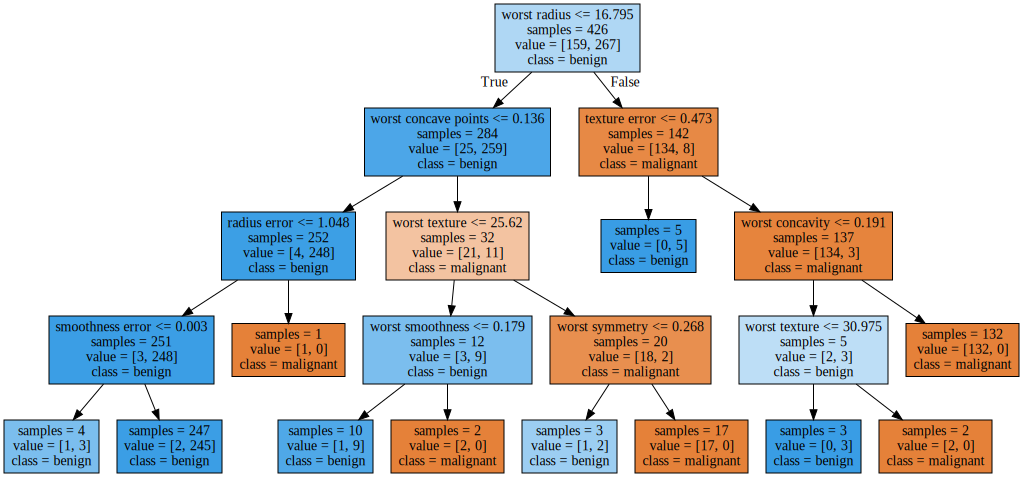

In [63]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

- **각 특성이 얼마나 잘 나누고 있는지에 대한 중요도를 수치화 했으며, 중요도의 합은 1이다.**

- **다른 특성이 동일한 정보를 가지는 경우도 있으니, 중요도가 낮다고 해서 유용하지 않다는 뜻이 아니다.**

In [64]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


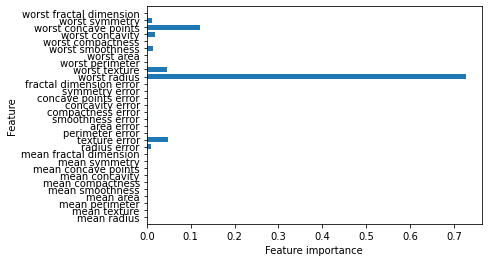

In [65]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


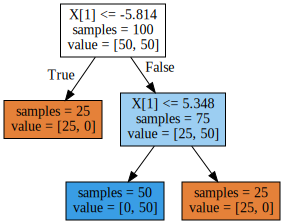

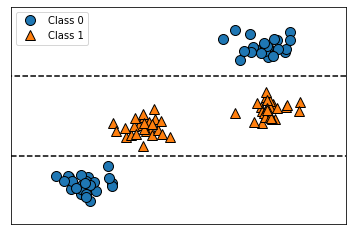

In [66]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 트리는 extrapolation(외삽)을 할 수 없다.

Text(0, 0.5, 'Price in $/Mbyte')

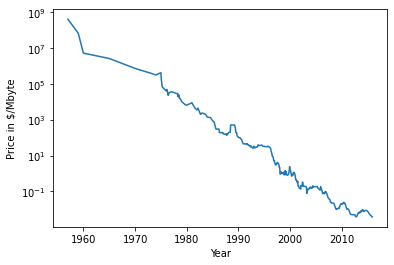

In [67]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [68]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-68-c79d02bcbbbe>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-68-c79d02bcbbbe>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


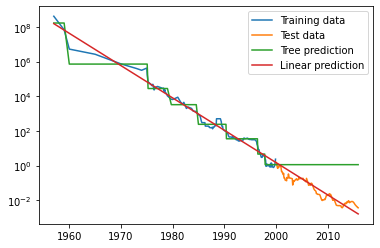

In [69]:
#가격을 로그스케일로 바꾸면 LinearRegression에선 큰 차이가 생기는데 뭘까?(4장)
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#책에선 트리의 깊이를 제한하지 않아서 훈련 데이터를 완벽히 따라간다.

### 트리 기반 모델의 장단점

> **장점**

- 과대적합을 막기위해 복잡도를 조절 하는데엔 보통 사전 가지치기만 해도 충분하다.

- 만들어진 모델을 쉽게 시각화 할 수 있어서 비전문가도 이해하기 쉽다.

- 데이터의 스케일에 구애받지 않는다.(각 특성이 개별적으로 처리되기 때문에 전처리X)

> **단점**

- 사전 가지치기를 해도 과대적합이 되는 경향이 있어 일반화 성능이 좋지 않다

  -> 그래서 단일 결정 트리의 대안으로 2.3.6 앙상블 방법을 사용한다

# 결정 트리의 앙상블

**앙상블: 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법**

## 1. RandomForest 결정 트리(과대적합 회피)

- **다른 방향으로 과대적합이 된 트리들의 결과를 평균냄으로써 과대적합을 줄일 수 있다.**

- **데이터 포인트를 무작위로 선택하거나 분할 테스트에서 특성을 무작위로 선택해 트리를 랜덤하게 만들어야한다**

> ### 매개변수 

- **n_jobs 매개변수로 코어 수 조정 가능(-1 -> 모든 코어 사용)**

- **n_estimators(트리 개수, 클수록 좋음), max_features, max_depth**

    **max_features(핵심)의 기본값은 아래와 같다**

- **분류: max_features=sqrt(n_features), 회귀: max_features=n-features**

> ### 랜덤 포레스트 구축

   **1.생성할 트리의 개수를 정한다.**
   
   **2.BooststrapSample을 n_samples 횟수만큼 추줄하고 각 노드에서 max_features만큼의 후보 특성을 무작위로 선택 후 최선의 테스트를 찾는다.**
   
   -> max_feature 값이 크면 랜덤포레스트 트리들은 비슷해져서 가장 두드러진 특성을 이용해 데이터에 자 ㄹ맞춰질 것이고 값이 낮으면 트리들은 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어진다.
   
   **3.알고리즘이 모델에 있는 모든 트리의 예측을 만든다.**
   
   -> 회귀의 경우: 예측들을 평균하여 최종 예측을 만듦.
      분류의 경우: 약한 투표 전략을 사용
      즉, 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 함
      트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨
      

> ### 랜덤 포레스트 분석


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #노이즈?
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) #트리개수
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

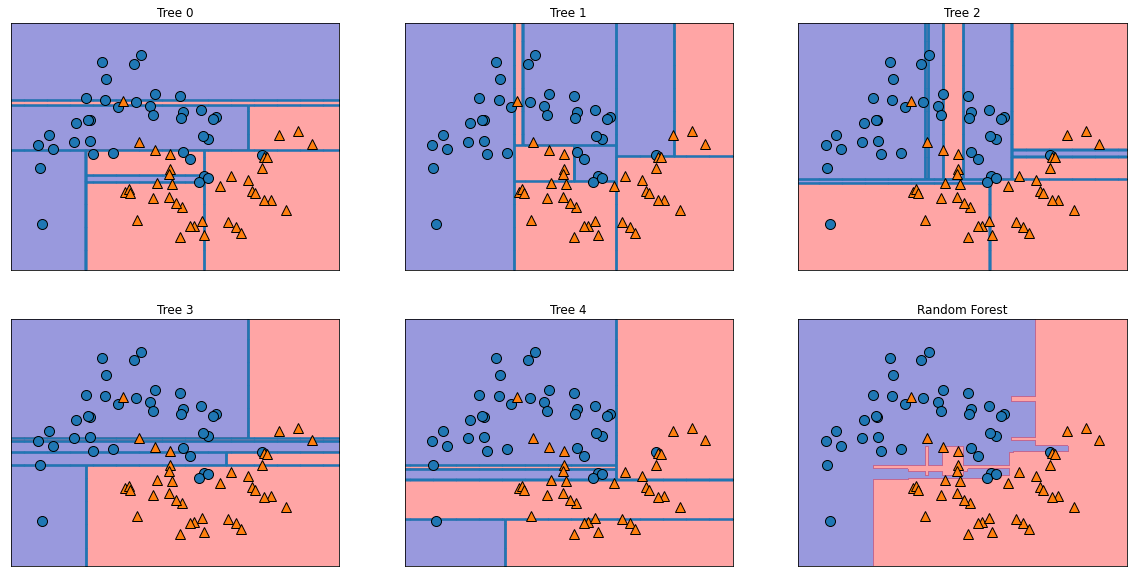

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


#부드러운 결정 경계

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#매개변수 튜닝 없이도 선형모델, 단일 결정 트리보다 높은 정확도
#max_features를 설정해주지 않아도 좋은 결과 나옴

Accuracy on training set: 1.000
Accuracy on test set: 0.972


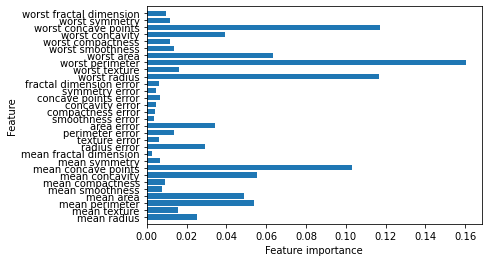

In [74]:
plot_feature_importances_cancer(forest)

#단일 결정 트리 때 처럼 radius가 중요하다 보지만 새롭게 등장하는 중요한 특성도 보이며
#많은 특성들이 0 이상의 중요도를 갖는다
#일반적으로 단일 결정 트리보다 특성의 중요도 신뢰도가 높다

### 랜덤 포레스트 장단점

> **장점**

- 튜닝 없이도 성능이 좋으며 스케일을 맞출 필요도 없다.

> **단점**

- 특성의 일부만을 사용하므로 전체적으로 분석하기 힘듦

- 의사 결정 과정을 간소하게 표현하기 힘듦

- 텍스트 데이터와 같은 높은 차원 또는 희소한 데이터에는 잘 작동하지 않음

- 선형 모델보다 속도가 느리며 메모리 사용이 많음



## 2. 그레이디언트 부스팅 회귀 트리

- **회귀, 분류에 모두 사용 되며 이전 트리의 오차를 보완하는 방식이므로 무작위성이 없음**

- **보통 1~5개의 깊지 않은 트리를 사용해서 예측이 빠름**

- **약한 학습기들을 많이 연결하는 것에서 도출된 아이디어이므로 트리가 많을수록 좋음**

- **랜덤 포레스트도 잘 되지만 성능을 쥐어 짜야하거나 예측 시간이 중요할 때 사용됨**

> **매개변수**

- learning_rate(오차 보정 강도),n_estimators라는 매개변수가 중요하다. 

- learning_rate를 낮추면 많은 트리를 추가해야 하는데 그러면 과대적합이 될 수 있다.

- 트리 개수를 먼저 조정한 후 오차 보정 강도를 조절하는게 일반적이다.

- n_iter_no_change: 반복 동안 검증 점수가 향상되지 않으면 훈련 종료

### 유방암 데이터셋을 이용한 GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#과대적합

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [84]:
#트리의 깊이 줄이기

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [85]:
#학습률 낮추기
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#학습률을 낮추는 것보다 트리의 깊이를 줄이는게 효과적이었다

Accuracy on training set: 0.988
Accuracy on test set: 0.965


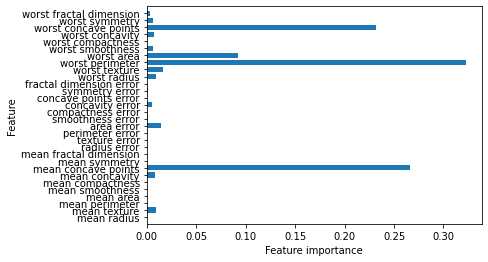

In [87]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#깊이가 1이라서 100개의 트리를 사용해도 모든 트리를 분석하기 힘듦

### 그레디이언트 부스팅의 장단점

> **장점**

- 속도와 성능 면에서 좋다.

- 특성의 스케일을 조정하지 않아도 되며 이진, 연속적인 특성에서도 잘 작동함.

> **단점**

- 매개변수를 잘 조정해야 하며 훈련 시간이 길다.

- 트리 기반 모델의 특성 상 희소한 고차원 데이터에는 잘 작동되지 않음.

# 2.3.7 배깅, 엑스트라 트리, 에이다 부스트

## Bagging(Bootstrap aggregating)

- **중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습**

- **predict_proba() 메서드로 확률값을 평균하여 예측 하며 그 외에는 빈도가 높은 클래스 레이블이 예측 결과가 됨**

